Convert raw text in file to something python can work with

In [28]:
import itertools
import numpy
with open('stagnation_radii.csv') as f:
    raw_text = f.readlines()
raw_text = [line.replace('"','') for line in raw_text]
raw_text = [line.split('},{') for line in raw_text]
raw_text = list(itertools.chain.from_iterable(raw_text))
raw_text = [line.replace('{','').replace('}\n','').replace('}','') for line in raw_text]
raw_text = [line.split(',') for line in raw_text]
raw_text = [[float(itm) for itm in line] for line in raw_text]
raw_data = numpy.array(raw_text)

Plot data

<IPython.core.display.Javascript object>


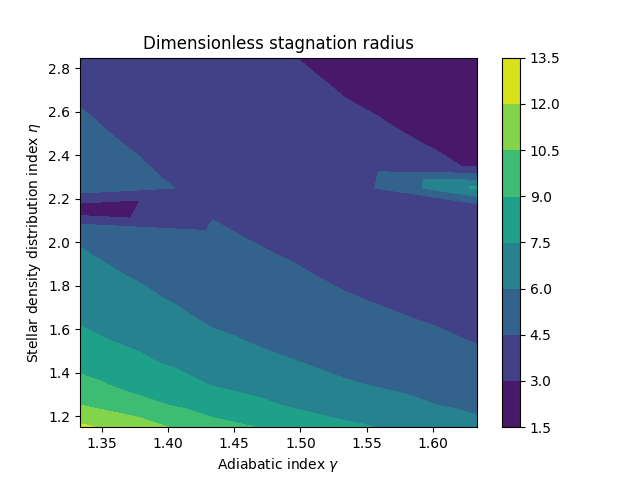

In [33]:
%matplotlib notebook
import pylab

pylab.tricontourf(raw_data.T[0],
                 raw_data.T[1],
                 raw_data.T[2])
pylab.colorbar()
pylab.xlabel(r'Adiabatic index $\gamma$')
pylab.ylabel(r'Stellar density distribution index $\eta$')
pylab.title('Dimensionless stagnation radius')
pass

As one can see, there's this annoying blips aroung $\eta \approx 2.3$. This is because that's where the border between the super and subsonic domains, so numerical integration goes wild there. The next step would be to clean it up.

<IPython.core.display.Javascript object>


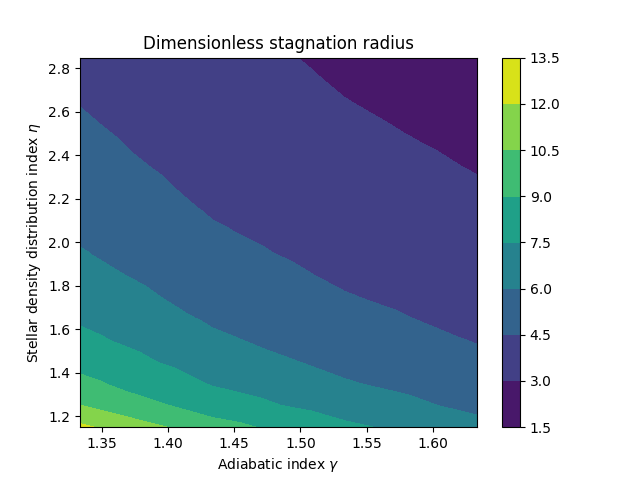

In [42]:
clean_data = numpy.array([line for line in raw_data if line[0]>1.35 or abs(line[1]-2.15)>0.1])
clean_data = numpy.array([line for line in clean_data if line[0]<1.6 or abs(line[1]-2.25)>0.1])

%matplotlib notebook
import pylab

pylab.tricontourf(clean_data.T[0],
                 clean_data.T[1],
                 clean_data.T[2])
pylab.colorbar()
pylab.xlabel(r'Adiabatic index $\gamma$')
pylab.ylabel(r'Stellar density distribution index $\eta$')
pylab.title('Dimensionless stagnation radius')
pass